# Visualization Case Study

- We learned about exploratory and explanatory analysis in this course

- We will now complete case study for diamonds

- We will move through explanatory data visualization process

    - first go through univariate visualization, then bivariate, then multivariate
    
    - last we will select some plots and polish them up for explanatory analysis

## Columns
- price: Price in dollars. Data was collected in 2008.

- carat: Diamond weight. 1 carat is equal to 0.2 grams.

- cut: Quality of diamond cut, affects its shine. Grades go from (low) Fair, Good, Very Good, Premium, Ideal (best).

- color: Measure of diamond coloration. Increasing grades go from (some color) J, I, H, G, F, E, D (colorless).

- clarity: Measure of diamond inclusions. Increasing grades go from (inclusions) I1, SI2, SI1, VS2, VS1, VVS2, VVS1, IF (internally flawless).

- x, y, z: Diamond length, width, and depth, respectively, in mm.

- table: Ratio of width of top face of diamond to its overall width, as a percentage.

- depth: Proportional depth of diamond, as a percentage. This is computed as 2 * z / (x + y), or the ratio of the depth to the average of length and width.

- We will focus on: price, carat, cut, color, clarity

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn

%matplotlib inline

In [7]:
diamonds = pd.read_csv("diamonds.csv")

In [8]:
# high-level overview of data shape and composition
print(diamonds.shape)
print(diamonds.dtypes)
diamonds.head(10)

(53940, 10)
carat      float64
cut         object
color       object
clarity     object
depth      float64
table      float64
price        int64
x          float64
y          float64
z          float64
dtype: object


,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
5,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48
6,0.24,Very Good,I,VVS1,62.3,57.0,336,3.95,3.98,2.47
7,0.26,Very Good,H,SI1,61.9,55.0,337,4.07,4.11,2.53
8,0.22,Fair,E,VS2,65.1,61.0,337,3.87,3.78,2.49
9,0.23,Very Good,H,VS1,59.4,61.0,338,4.00,4.05,2.39


In [9]:
# descriptive statistics for numeric variables
diamonds.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


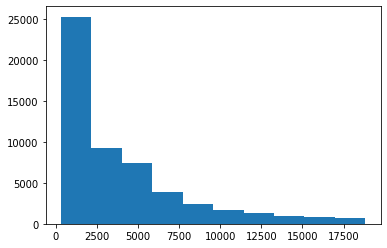

In [11]:
plt.hist(diamonds.price);

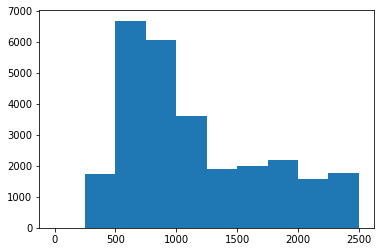

In [18]:
plt.hist(diamonds.price, range=(0, 2500) );

Finding:

- We can see a clear right skew (average is much bigger then the mean) and a the bucket from about 500-600 is where the most values occur

- To get a clearer idea we will zoom in on the 300-2500 range with different sized buckets

(array([   0.,    0.,    0.,  247., 1482., 2380., 2828., 2846., 2544.,
        2172., 1857., 1192., 1040.,  833.,  589.,  463., 1115.,  920.,
         932.,  763.,  654.,  617.,  627.,  843.,  598.]),
 array([   0,  100,  200,  300,  400,  500,  600,  700,  800,  900, 1000,
        1100, 1200, 1300, 1400, 1500, 1600, 1700, 1800, 1900, 2000, 2100,
        2200, 2300, 2400, 2500]),
 <a list of 25 Patch objects>)

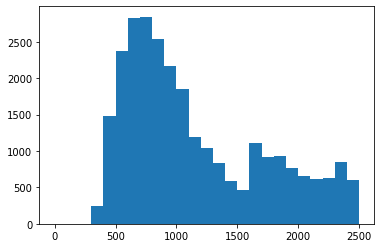

In [21]:
x_min, x_max = 0, 2500
bucket_size = 100
x_range = np.arange(x_min, x_max+bucket_size, bucket_size)
plt.hist(diamonds.price, range=(x_min, x_max), bins = x_range)

(array([ 614.,  868., 1083., 1297., 1405., 1423., 1484., 1383.]),
 array([400, 450, 500, 550, 600, 650, 700, 750, 800]),
 <a list of 8 Patch objects>)

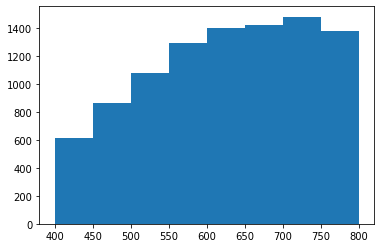

In [26]:
x_min, x_max = 400, 800
bucket_size = 50
x_range = np.arange(x_min, x_max+bucket_size, bucket_size)
plt.hist(diamonds.price, range=(x_min, x_max), bins = x_range)

Findings: Top bin is between 700-750, which means that the top bin falls into this category. The mode bucket is 700-750